In [43]:
import os 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [44]:
DATA_DIR = 'input_data\\raw'
PROCESSED_DATA_DIR = 'input_data\\processed'

In [45]:
def collect_paths_labels(input_dir: str) -> tuple[pd.Series, pd.Series]:
    files_paths = dict() 
    labels = []
    
    for folder in os.listdir(input_dir):
        folder_path = os.path.join(input_dir, folder)
        
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            full_file_name = os.path.join(folder, file)
            files_paths[full_file_name] = file_path
            labels.append(folder)
            
    return files_paths, labels

def create_input_df(files_paths: dict[str,str], labels: list[str]) -> pd.DataFrame:
    file_paths_series = pd.Series(list(files_paths.values()), name='file_path')
    labels_series = pd.Series(labels, name='label')
    return pd.concat([file_paths_series, labels_series], axis=1)

raw_paths, raw_labels = collect_paths_labels(DATA_DIR)
df_raw = create_input_df(raw_paths, raw_labels)

In [46]:
df_raw.sample(10, random_state=42)

,file_path,label
1089,input_data\raw\Sunrise\sunrise67.jpg,Sunrise
1103,input_data\raw\Sunrise\sunrise8.jpg,Sunrise
739,input_data\raw\Shine\shine73.jpg,Shine
140,input_data\raw\Cloudy\cloudy225.jpg,Cloudy
1018,input_data\raw\Sunrise\sunrise324.jpg,Sunrise
527,input_data\raw\Shine\shine11.jpg,Shine
812,input_data\raw\Sunrise\sunrise139.jpg,Sunrise
481,input_data\raw\Rain\rain69.jpg,Rain
1118,input_data\raw\Sunrise\sunrise93.jpg,Sunrise
950,input_data\raw\Sunrise\sunrise263.jpg,Sunrise


In [47]:
df_raw.loc[:, 'label'].value_counts()

label
Sunrise    357
Cloudy     300
Shine      253
Rain       215
Name: count, dtype: int64

In [48]:
RESIZED_IMAGE_SIZE = (256, 256)

for file, file_path in raw_paths.items():
    image = Image.open(file_path)
    resized_image = image.resize(RESIZED_IMAGE_SIZE)
    target_path = os.path.join(PROCESSED_DATA_DIR, file)
    os.makedirs(os.path.dirname(target_path), exist_ok=True)
    print(f'Saving {target_path}')
    try:
        resized_image.save(target_path)
    except OSError:
        print(f'Changing to RGB {target_path}')
        converted_image = resized_image.convert('RGB')
        converted_image.save(target_path)

print('Resized all images to image size:', RESIZED_IMAGE_SIZE)

Saving input_data\processed\Cloudy\cloudy1.jpg
Saving input_data\processed\Cloudy\cloudy10.jpg
Saving input_data\processed\Cloudy\cloudy100.jpg
Saving input_data\processed\Cloudy\cloudy101.jpg
Saving input_data\processed\Cloudy\cloudy102.jpg
Saving input_data\processed\Cloudy\cloudy103.jpg
Saving input_data\processed\Cloudy\cloudy104.jpg
Saving input_data\processed\Cloudy\cloudy105.jpg
Saving input_data\processed\Cloudy\cloudy106.jpg
Saving input_data\processed\Cloudy\cloudy107.jpg
Saving input_data\processed\Cloudy\cloudy108.jpg
Saving input_data\processed\Cloudy\cloudy109.jpg
Saving input_data\processed\Cloudy\cloudy11.jpg
Saving input_data\processed\Cloudy\cloudy110.jpg
Saving input_data\processed\Cloudy\cloudy111.jpg
Saving input_data\processed\Cloudy\cloudy112.jpg
Saving input_data\processed\Cloudy\cloudy113.jpg
Saving input_data\processed\Cloudy\cloudy114.jpg
Saving input_data\processed\Cloudy\cloudy115.jpg
Saving input_data\processed\Cloudy\cloudy116.jpg
Saving input_data\proces

In [49]:
processed_paths, processed_labels = collect_paths_labels(PROCESSED_DATA_DIR)
df_scaled = create_input_df(processed_paths, processed_labels)
df_scaled

,file_path,label
0,input_data\processed\Cloudy\cloudy1.jpg,Cloudy
1,input_data\processed\Cloudy\cloudy10.jpg,Cloudy
2,input_data\processed\Cloudy\cloudy100.jpg,Cloudy
3,input_data\processed\Cloudy\cloudy101.jpg,Cloudy
4,input_data\processed\Cloudy\cloudy102.jpg,Cloudy
...,...,...
1120,input_data\processed\Sunrise\sunrise95.jpg,Sunrise
1121,input_data\processed\Sunrise\sunrise96.jpg,Sunrise
1122,input_data\processed\Sunrise\sunrise97.jpg,Sunrise
1123,input_data\processed\Sunrise\sunrise98.jpg,Sunrise


In [50]:
df_scaled.loc[:, 'label'].value_counts()

label
Sunrise    357
Cloudy     300
Shine      253
Rain       215
Name: count, dtype: int64

In [55]:
def plot_histogram(image: Image, ax, color, channel):
    """Plot histogram for a single channel."""
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))
    ax.plot(bin_edges[0:-1], histogram, color=color)
    ax.set_title(f"{channel} channel")
    ax.set_xlabel('Pixel Intensity (0-255)', fontsize=12)
    ax.set_ylabel('Frequency of Pixels', fontsize=12)

def compute_and_plot_histograms(image: Image):
    """Load image, compute histograms for each RGB channel, and plot them."""
    image_array = np.array(image)

     
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Red channel
    plot_histogram(image_array[:, :, 0], axs[0], 'red', 'Red')

    # Green channel
    plot_histogram(image_array[:, :, 1], axs[1], 'green', 'Green')

    # Blue channel
    plot_histogram(image_array[:, :, 2], axs[2], 'blue', 'Blue')
    
    plt.show()
    

def calculate_channel_correlation(image: Image):
    """Load image, split channels, and calculate correlation between RGB channels."""
    image_array = np.array(image)

    red_channel = image_array[:, :, 0].flatten()
    green_channel = image_array[:, :, 1].flatten()
    blue_channel = image_array[:, :, 2].flatten()

    channels_matrix = np.vstack((red_channel, green_channel, blue_channel))
    correlation_matrix = np.corrcoef(channels_matrix)

    return correlation_matrix
    

Displaying Sunrise weather.


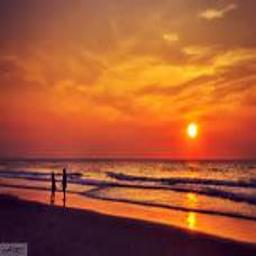

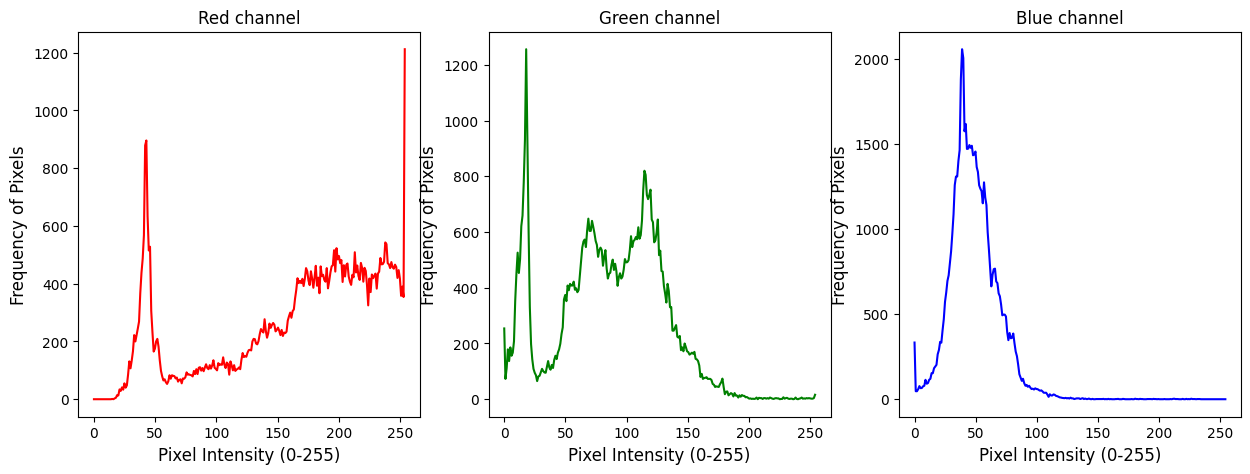

Correlation matrix between channels (Red, Green, Blue):
[[1.         0.87285359 0.09710984]
 [0.87285359 1.         0.32336363]
 [0.09710984 0.32336363 1.        ]]
Displaying Rain weather.


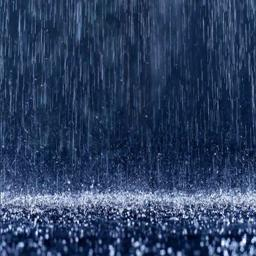

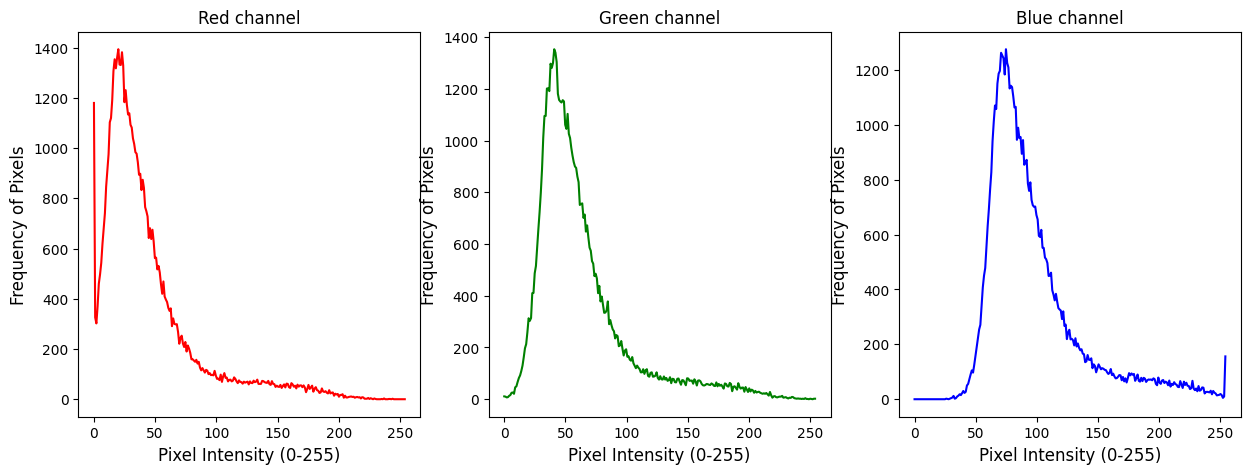

Correlation matrix between channels (Red, Green, Blue):
[[1.         0.99687625 0.99111863]
 [0.99687625 1.         0.99389117]
 [0.99111863 0.99389117 1.        ]]
Displaying Shine weather.


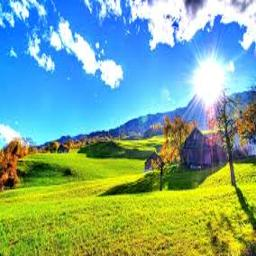

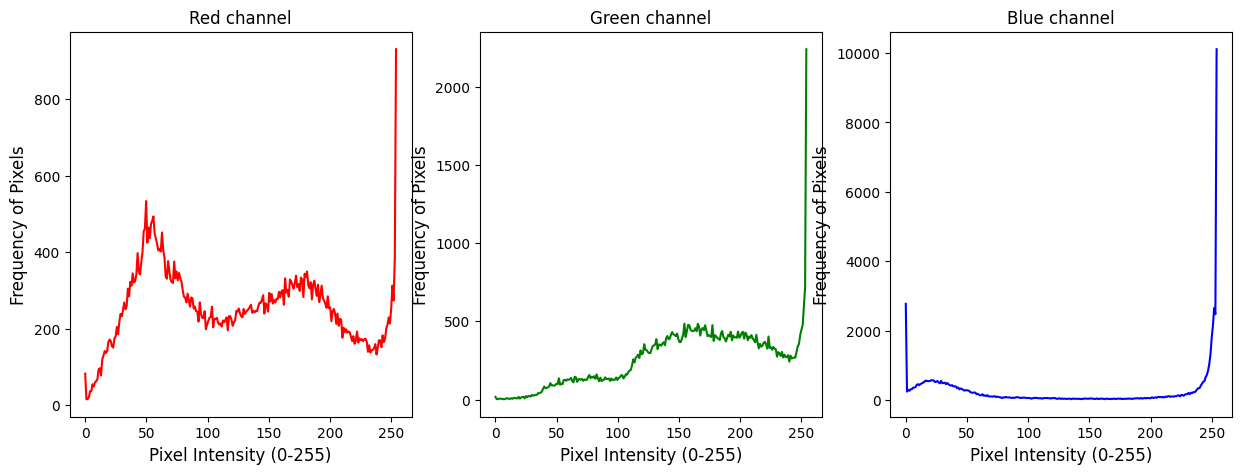

Correlation matrix between channels (Red, Green, Blue):
[[ 1.          0.72327343 -0.22068451]
 [ 0.72327343  1.          0.28954302]
 [-0.22068451  0.28954302  1.        ]]
Displaying Cloudy weather.


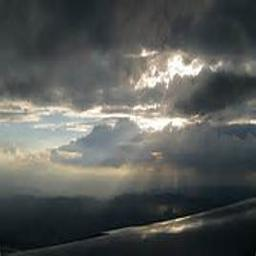

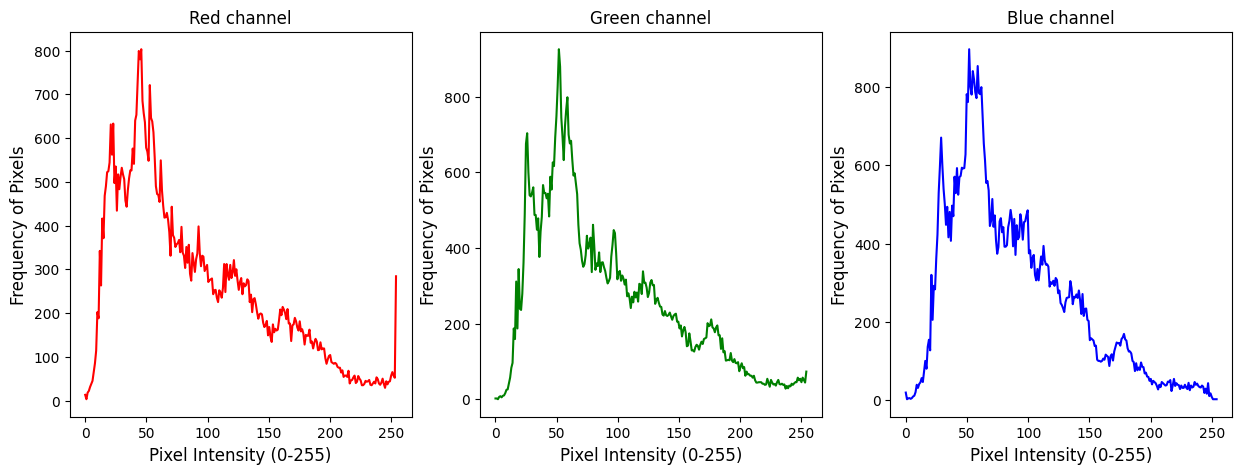

Correlation matrix between channels (Red, Green, Blue):
[[1.         0.99617653 0.98405108]
 [0.99617653 1.         0.99378988]
 [0.98405108 0.99378988 1.        ]]


In [56]:
for unique_label in set(df_scaled.label):
    image_path = df_scaled.loc[df_scaled.label == unique_label, 'file_path'].sample(1, random_state=24).values[0]
    processed_image = Image.open(image_path)
    print(f'Displaying {unique_label} weather.')
    display(processed_image)
    compute_and_plot_histograms(processed_image)
    correlation_matrix = calculate_channel_correlation(processed_image)
    print("Correlation matrix between channels (Red, Green, Blue):")
    print(correlation_matrix)
